In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10, 8)

# Reading data with header

There are at least 4 ways of reading data with header (4 ways that I've seen).

I will show one way using the `numpy` library. We will use the function:

```
np.genfromtxt('file.format', names=True)
```

where `file.format` is a string with the filename and format of the file we want to use. This fucntion can work with just the file argument, but with you want to read the header and access them, you need the `names=True` argument. There are other usefull arguments:

    delimeter=','     -> set the delimiter between values
    comments='#'      -> the default comment is the one python uses. This is usefull to skip commentaries on file
    skip_header=0     -> set the line where the header is and skip it
    and some more...

*full documentation in [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)*

## Reading a file

In [2]:
data = np.genfromtxt('OGLE-LMC-CEP-0018.dat', names=True)

## Print its header

In [3]:
#print(data)
print(data.dtype.names)
#print(data['Mag_I'])

('HJD', 'Mag_I', 'mag_err')


## Plot the data

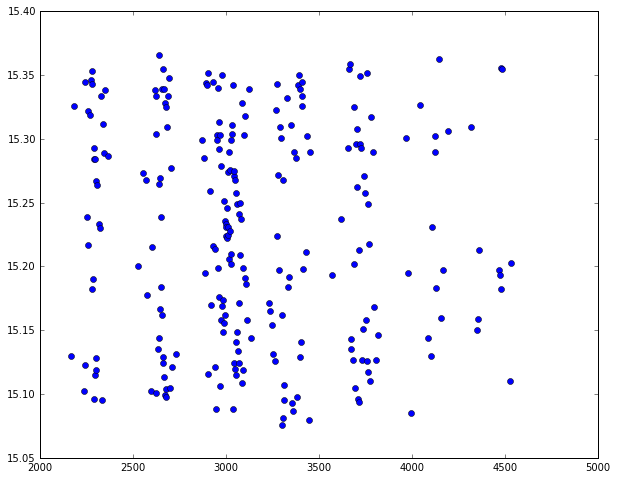

In [4]:
plt.plot(data['HJD'], data['Mag_I'], 'o')
plt.show()

In [5]:
#plt.errorbar(data['HJD'], data['Mag_I'], yerr=data['mag_err'], linestyle='', marker='o')
#plt.show()

### But this is a Cepheid variable with period p=4.0478526

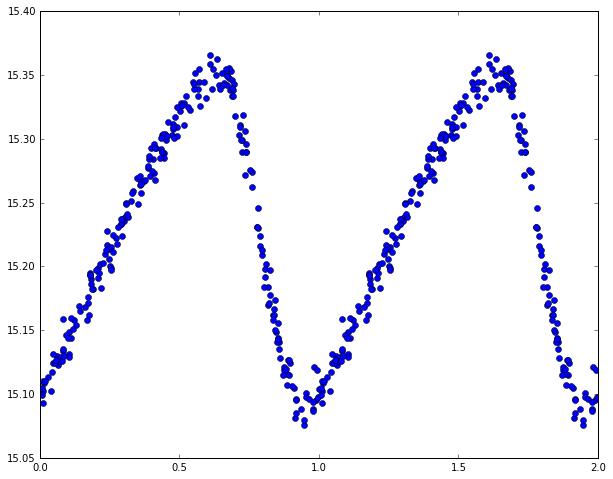

In [6]:
period = 4.0478526
# Rephase the data
rephase = (data['HJD'] / period ) % 1 # the '% 1' extract the float part of the division

# Plot
plt.plot(rephase, data['Mag_I'], 'bo')
plt.plot(rephase + 1, data['Mag_I'], 'bo')